In [25]:
import pandas as pd
import numpy as np
import seaborn as sns

In [26]:
data = pd.read_csv("insurance.csv")

In [27]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


C:\Users\Vanumamalai\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Vanumamalai\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Vanumamalai\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Vanumamalai\anaconda3\lib\site-package

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F0D3E5A588>,
      dtype=object)

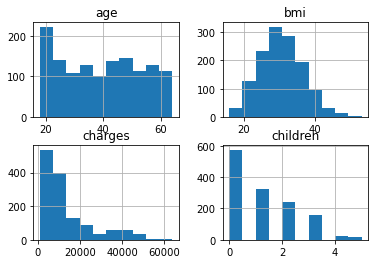

In [28]:
data.hist()

In [55]:
data["age"]

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

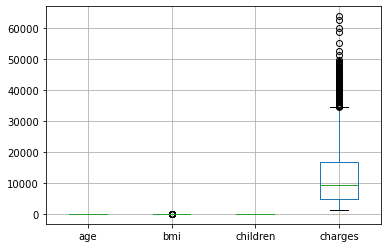

In [56]:
data.boxplot()

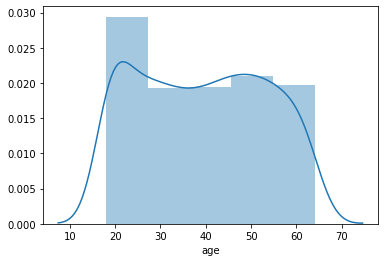

In [30]:
sns.distplot(data["age"],bins=5)

In [31]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [32]:
Age = data["age"]
EL = []
for i in Age:
    if i==18:
        EL.append("A")
    else:
        pass
print(len(EL))

69


In [33]:
#Now our train data will be age,sex,bmi,children and target is going to be charges 
#We obviously dont want the region
#So we shall drop the unwanted data 
data = data.drop(["region"],axis=1)

In [34]:
data.head(10)

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
5,31,female,25.740,0,no,3756.62160
6,46,female,33.440,1,no,8240.58960
7,37,female,27.740,3,no,7281.50560
8,37,male,29.830,2,no,6406.41070
9,60,female,25.840,0,no,28923.13692


In [35]:
data.head(2)

,age,sex,bmi,children,smoker,charges
0,19,female,27.90,0,yes,16884.9240
1,18,male,33.77,1,no,1725.5523


In [36]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [37]:
#Now transform the categorical variable 
#We have two categorical variable ie. Sex and Smoker 
#import the packages to perform Columntransforming
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
X[:,1]=number.fit_transform(X[:,1].astype("str"))
X[:,4]=number.fit_transform(X[:,4].astype("str"))

In [38]:
X

array([[19, 0, 27.9, 0, 1],
       [18, 1, 33.77, 1, 0],
       [28, 1, 33.0, 3, 0],
       ...,
       [18, 0, 36.85, 0, 0],
       [21, 0, 25.8, 0, 0],
       [61, 0, 29.07, 0, 1]], dtype=object)

In [39]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [41]:
from sklearn.linear_model import LinearRegression
lg_mod = LinearRegression()
lg_mod.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
y_pred = lg_mod.predict(X_test)

In [43]:
y_pred

array([11457.24748797,  9925.93074028, 37768.54941888, 15853.34679049,
        6939.11972533,  3715.15809068,  1226.51797859, 14013.62531872,
        8801.37793745,  7319.3569299 ,  4273.75316151, 10130.71955326,
        9085.31708787,  4373.32320457, 27814.85680664, 11178.7533822 ,
       11185.96123339,  5630.52468867,  8076.08092103, 26738.70765833,
       33571.19206907, 14028.13563512, 11218.6467869 , 32627.93297826,
        4586.6864    ,  8662.71797281,   909.82505247, 10181.12419998,
        4318.89099156, 10226.29974927,  8827.54515889, 40279.78845676,
       15797.33819958, 14003.57232067, 24541.57502951,  4754.90669146,
       12888.4411817 , 30986.42695074, 33296.10937045,  3923.72690408,
        3729.50340695,  4518.10338943, 30179.67003291, 39152.46681933,
       28159.50615257,  4858.31074493, 11075.11507975,  7719.48440006,
        3314.0509843 , 10750.82941843,  5170.52098751,  3301.78200967,
       33383.67630651, 37846.88608306, 16194.84338063,  6620.18331508,
      

In [44]:
lg_mod.coef_

array([2.51765762e+02, 1.18219052e+01, 3.14055462e+02, 4.38766233e+02,
       2.36244139e+04])

In [45]:
lg_mod.intercept_

-11569.635215817894

In [46]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7952171980481992

In [49]:
lr_pred =lg_mod.predict(np.array([[19,0,27.90,0,0]]))
lr_pred

array([1976.06164763])